In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Linear Regression with one variable

The objective is to implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

### Load Data

The first column is the population of a city and the second column is the profit of a food truck in that city.

In [165]:
data = pd.read_csv('ex1data1.txt', names=['population','profit'])

In [3]:
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


In [5]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


###  Plot data

(array([32., 17., 12.,  9.,  7.,  3.,  3.,  2.,  0.,  4.,  1.,  1.,  0.,
         0.,  0.,  0.,  2.,  2.,  1.,  1.]),
 array([ 5.0269  ,  5.885705,  6.74451 ,  7.603315,  8.46212 ,  9.320925,
        10.17973 , 11.038535, 11.89734 , 12.756145, 13.61495 , 14.473755,
        15.33256 , 16.191365, 17.05017 , 17.908975, 18.76778 , 19.626585,
        20.48539 , 21.344195, 22.203   ]),
 <a list of 20 Patch objects>)

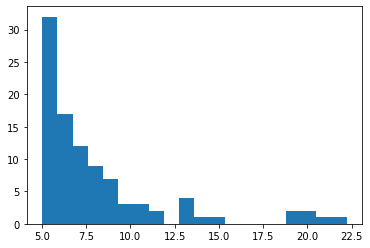

In [6]:
plt.hist(data.population, bins=20)

(array([ 2.,  2., 15.,  9., 14., 15., 10., 11.,  2.,  1.,  4.,  1.,  3.,
         1.,  1.,  2.,  0.,  1.,  2.,  1.]),
 array([-2.6807000e+00, -1.3393150e+00,  2.0700000e-03,  1.3434550e+00,
         2.6848400e+00,  4.0262250e+00,  5.3676100e+00,  6.7089950e+00,
         8.0503800e+00,  9.3917650e+00,  1.0733150e+01,  1.2074535e+01,
         1.3415920e+01,  1.4757305e+01,  1.6098690e+01,  1.7440075e+01,
         1.8781460e+01,  2.0122845e+01,  2.1464230e+01,  2.2805615e+01,
         2.4147000e+01]),
 <a list of 20 Patch objects>)

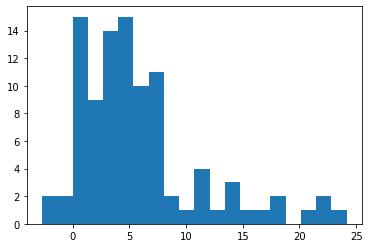

In [7]:
plt.hist(data.profit, bins=20)

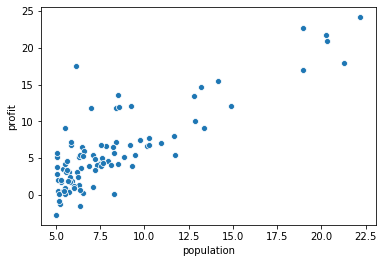

In [8]:
sns.scatterplot(x=data.population, y=data.profit)

In [166]:
X = data.population.to_numpy()
y = data.profit.to_numpy()
m = len(y)

In [168]:
X = np.vstack((np.ones(m),X))

In [169]:
X

array([[ 1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ,
         1.    ,  1.    ,  1.    ,  1.    ,  1.    ,  1.    ],
       [ 6.110

In [11]:
theta = np.zeros(2)

In [12]:
theta

array([0., 0.])

In [13]:
def computeCost(X, y, theta):
    m = len(y)
    predictions = theta.dot(X)
    sqrErrors = (predictions - y)**2
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [14]:
J = computeCost(X, y, theta)

In [15]:
J

32.072733877455676

In [16]:
def gradientDescent(X,y, theta, alpha, num_iters=1000):
    J_history = []
    m = len(y)
    for x in range(num_iters):
        predictions = theta.dot(X)
        error = (predictions - y)
        delta = (1/m)*error.dot(X.T)
        theta = theta - alpha*delta
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [17]:
alpha = 0.01

In [18]:
theta, J_history = gradientDescent(X,y,theta, alpha,10000)

In [19]:
theta

array([-3.89578082,  1.19303364])

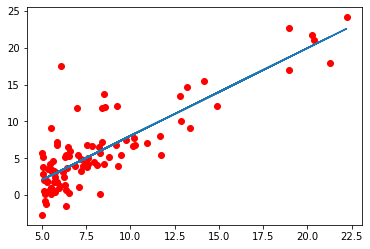

In [20]:
plt.plot(X[1],y,'ro')
plt.plot(X[1],theta.dot(X))

In [21]:
#let's make some predictions
predict1 = theta.dot(np.array([1,3.5]))
predict1*10000

2798.3691398645315

In [22]:
predict2 = theta.dot(np.array([1,7]))
predict2*10000

44554.546482411424

### Visualizing J(theta_0, theta_1)

In [45]:
theta0_vals = np.linspace(0,10,100)
theta1_vals = np.linspace(-1,4,100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

In [46]:
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i][j] = computeCost(X,y,t)

In [47]:
J_vals[]

array([[138.10355503, 130.7966289 , 123.6973447 , ..., 396.1125531 ,
        408.94689432, 421.98887747],
       [136.69462271, 129.42932396, 122.37166714, ..., 398.74147712,
        411.61744572, 424.70105626],
       [135.29589343, 128.07222206, 121.05619263, ..., 401.38060417,
        414.29820017, 427.42343809],
       ...,
       [ 48.94247627,  45.67340647,  42.61197861, ..., 698.62353943,
        715.49573699, 732.57557648],
       [ 48.52323887,  45.29579646,  42.27599599, ..., 702.24215837,
        719.15598332, 736.2774502 ],
       [ 48.11420452,  44.9283895 ,  41.95021641, ..., 705.87098036,
        722.82643269, 739.98952696]])

In [78]:
Theta0, Theta1 = np.meshgrid(theta0_vals, theta1_vals)

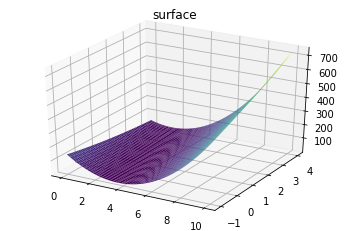

In [85]:
ax = plt.axes(projection='3d')
ax.plot_surface(Theta0, Theta1, J_vals,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

In [227]:
# Examples of 3d figures

In [63]:
from mpl_toolkits import mplot3d
%matplotlib inline

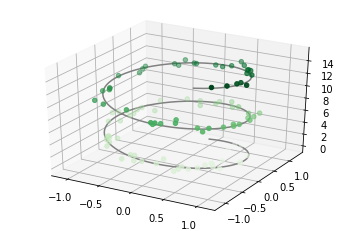

In [66]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

In [67]:
x1 = np.linspace(-6, 6, 30)
y1 = np.linspace(-6, 6, 30)
X1, Y1 = np.meshgrid(x1, y1)

In [68]:
X1

array([[-6.        , -5.5862069 , -5.17241379, -4.75862069, -4.34482759,
        -3.93103448, -3.51724138, -3.10344828, -2.68965517, -2.27586207,
        -1.86206897, -1.44827586, -1.03448276, -0.62068966, -0.20689655,
         0.20689655,  0.62068966,  1.03448276,  1.44827586,  1.86206897,
         2.27586207,  2.68965517,  3.10344828,  3.51724138,  3.93103448,
         4.34482759,  4.75862069,  5.17241379,  5.5862069 ,  6.        ],
       [-6.        , -5.5862069 , -5.17241379, -4.75862069, -4.34482759,
        -3.93103448, -3.51724138, -3.10344828, -2.68965517, -2.27586207,
        -1.86206897, -1.44827586, -1.03448276, -0.62068966, -0.20689655,
         0.20689655,  0.62068966,  1.03448276,  1.44827586,  1.86206897,
         2.27586207,  2.68965517,  3.10344828,  3.51724138,  3.93103448,
         4.34482759,  4.75862069,  5.17241379,  5.5862069 ,  6.        ],
       [-6.        , -5.5862069 , -5.17241379, -4.75862069, -4.34482759,
        -3.93103448, -3.51724138, -3.10344828, -2

In [69]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

In [71]:
Z = f(X1,Y1)

In [72]:
Z

array([[ 8.07261091e-01,  9.41437765e-01,  9.97705708e-01,
         9.80850719e-01,  9.02160390e-01,  7.77003505e-01,
         6.22348946e-01,  4.54593535e-01,  2.87954298e-01,
         1.33543814e-01, -8.84706779e-04, -1.10640850e-01,
        -1.93431827e-01, -2.48533645e-01, -2.75989644e-01,
        -2.75989644e-01, -2.48533645e-01, -1.93431827e-01,
        -1.10640850e-01, -8.84706779e-04,  1.33543814e-01,
         2.87954298e-01,  4.54593535e-01,  6.22348946e-01,
         7.77003505e-01,  9.02160390e-01,  9.80850719e-01,
         9.97705708e-01,  9.41437765e-01,  8.07261091e-01],
       [ 9.41437765e-01,  9.98937218e-01,  9.71132423e-01,
         8.69941049e-01,  7.12998635e-01,  5.20584150e-01,
         3.12742785e-01,  1.07000578e-01, -8.30932252e-02,
        -2.48533645e-01, -3.84629319e-01, -4.90176225e-01,
        -5.66292335e-01, -6.15169883e-01, -6.38962142e-01,
        -6.38962142e-01, -6.15169883e-01, -5.66292335e-01,
        -4.90176225e-01, -3.84629319e-01, -2.48533645e-

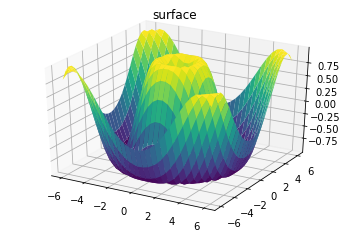

In [74]:
ax = plt.axes(projection='3d')
ax.plot_surface(X1, Y1, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

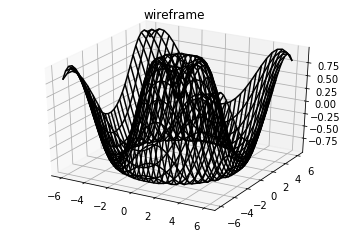

In [75]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X1, Y1, Z, color='black')
ax.set_title('wireframe');

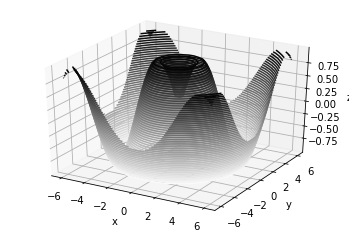

In [77]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1, Y1, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

## Linear Regression with Multiple Variables 

### Load Data

The file ex1data2.txt contains a training set of housing prices in Portland, Oregon. The first column is the size of the house (in square feet), the second column is the number of bedrooms, and the third column is the price of the house.

In [175]:
house = pd.read_csv('ex1data2.txt', names=['size','bedrooms','price'])

In [87]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   size      47 non-null     int64
 1   bedrooms  47 non-null     int64
 2   price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


In [88]:
house.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [89]:
house.describe()

,size,bedrooms,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


### Plot data

(array([ 1.,  0.,  6.,  0.,  0., 25.,  0., 14.,  0.,  1.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

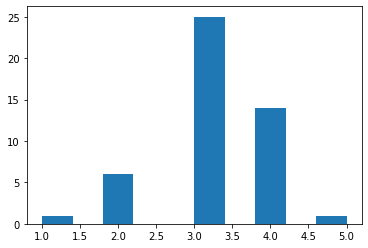

In [90]:
plt.hist(house.bedrooms)

(array([2., 3., 5., 6., 3., 6., 6., 5., 1., 4., 0., 1., 2., 0., 0., 0., 1.,
        0., 1., 1.]),
 array([ 852. , 1033.3, 1214.6, 1395.9, 1577.2, 1758.5, 1939.8, 2121.1,
        2302.4, 2483.7, 2665. , 2846.3, 3027.6, 3208.9, 3390.2, 3571.5,
        3752.8, 3934.1, 4115.4, 4296.7, 4478. ]),
 <a list of 20 Patch objects>)

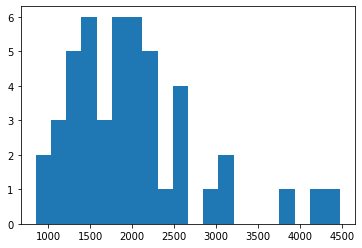

In [91]:
plt.hist(house['size'], bins=20)

(array([2., 3., 6., 6., 7., 3., 6., 2., 1., 0., 1., 3., 1., 1., 1., 2., 1.,
        0., 0., 1.]),
 array([169900., 196400., 222900., 249400., 275900., 302400., 328900.,
        355400., 381900., 408400., 434900., 461400., 487900., 514400.,
        540900., 567400., 593900., 620400., 646900., 673400., 699900.]),
 <a list of 20 Patch objects>)

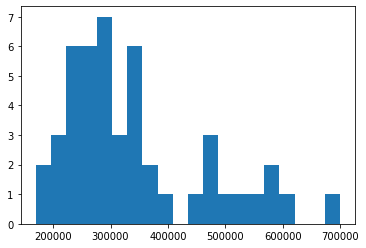

In [92]:
plt.hist(house.price, bins=20)

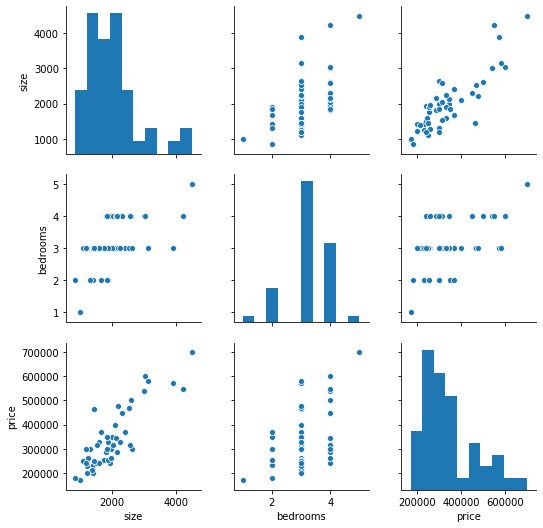

In [93]:
sns.pairplot(house)

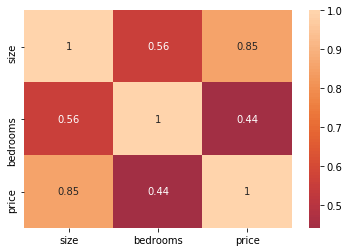

In [94]:
sns.heatmap(house.corr(), annot=True, center= 0)

### Feature Normalization

In [176]:
X_house = np.array([house['size'].to_numpy(),house.bedrooms.to_numpy()], dtype=np.float64)
y_house = house.price.to_numpy()
m = len(y_house)

In [177]:
X_house

array([[2.104e+03, 1.600e+03, 2.400e+03, 1.416e+03, 3.000e+03, 1.985e+03,
        1.534e+03, 1.427e+03, 1.380e+03, 1.494e+03, 1.940e+03, 2.000e+03,
        1.890e+03, 4.478e+03, 1.268e+03, 2.300e+03, 1.320e+03, 1.236e+03,
        2.609e+03, 3.031e+03, 1.767e+03, 1.888e+03, 1.604e+03, 1.962e+03,
        3.890e+03, 1.100e+03, 1.458e+03, 2.526e+03, 2.200e+03, 2.637e+03,
        1.839e+03, 1.000e+03, 2.040e+03, 3.137e+03, 1.811e+03, 1.437e+03,
        1.239e+03, 2.132e+03, 4.215e+03, 2.162e+03, 1.664e+03, 2.238e+03,
        2.567e+03, 1.200e+03, 8.520e+02, 1.852e+03, 1.203e+03],
       [3.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 4.000e+00, 3.000e+00,
        3.000e+00, 5.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 3.000e+00,
        4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 4.000e+00,
        3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 4.000e+00, 3.000e+

In [178]:
def featureNormalize(X):
    mu = X.mean(axis=1)
    sigma = X.std(axis=1)
    X_norm = (X.T - mu)/sigma
    return X_norm, mu, sigma

In [179]:
X_norm, mu, sigma = featureNormalize(X_house)

In [180]:
X_norm

array([[ 1.31415422e-01, -2.26093368e-01],
       [-5.09640698e-01, -2.26093368e-01],
       [ 5.07908699e-01, -2.26093368e-01],
       [-7.43677059e-01, -1.55439190e+00],
       [ 1.27107075e+00,  1.10220517e+00],
       [-1.99450507e-02,  1.10220517e+00],
       [-5.93588523e-01, -2.26093368e-01],
       [-7.29685755e-01, -2.26093368e-01],
       [-7.89466782e-01, -2.26093368e-01],
       [-6.44465993e-01, -2.26093368e-01],
       [-7.71822042e-02,  1.10220517e+00],
       [-8.65999486e-04, -2.26093368e-01],
       [-1.40779041e-01, -2.26093368e-01],
       [ 3.15099326e+00,  2.43050370e+00],
       [-9.31923697e-01, -2.26093368e-01],
       [ 3.80715024e-01,  1.10220517e+00],
       [-8.65782986e-01, -1.55439190e+00],
       [-9.72625673e-01, -2.26093368e-01],
       [ 7.73743478e-01,  1.10220517e+00],
       [ 1.31050078e+00,  1.10220517e+00],
       [-2.97227261e-01, -2.26093368e-01],
       [-1.43322915e-01, -1.55439190e+00],
       [-5.04552951e-01, -2.26093368e-01],
       [-4.

In [181]:
X = np.vstack((np.ones(m),X_norm.T))

In [183]:
X

array([[ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00],
       [ 1.31415422e-01, -5.09640698e-01,  5.07908699e-01,
        -7.43

### Gradient Descent

In [184]:
#choose some alpha and iterations
alpha = 0.16
num_iters =50

In [185]:
# Init Theta
theta = np.zeros(3)

In [186]:
def computeCostMulti(X,y,theta):
    m = len(y)
    predictions = theta.dot(X)
    sqrErrors = (predictions - y)**2
    J = 1/(2*m)*np.sum(sqrErrors)
    return J

In [200]:
def gradientDescentMulti(X,y, theta, alpha, num_iters):
    m = len(y)
    J_history = []
    for i in range(num_iters):
        predictions = theta.dot(X)
        error = (predictions - y)
        delta = (1/m)*error.dot(X.T)
        theta = theta - alpha*delta
        J_history.append(computeCost(X,y,theta))
    return theta, J_history

In [201]:
theta, j_history = gradientDescentMulti(X,y_house, theta, alpha, num_iters)

In [202]:
theta

array([340356.94484761, 107940.43402005,  -5071.05225668])

In [208]:
# Time for some predictions
predict1 = theta.dot(np.array([1,(1650 - mu[0])/sigma[0], (3 - mu[1])/sigma[1]]))
predict1*10000

2933573082.537425

### Visualizing Cost Function Vs Iterations

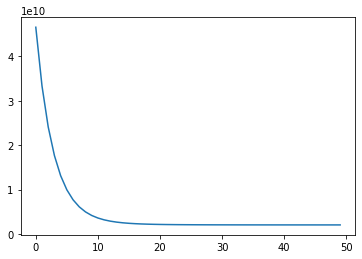

In [209]:
plt.plot(np.arange(num_iters), j_history)

## Normal Equation

In [210]:
house = pd.read_csv('ex1data2.txt', names=['size','bedrooms','price'])
X = np.array([house['size'].to_numpy(),house.bedrooms.to_numpy()], dtype=np.float64)
y = house.price.to_numpy()
m = len(y)

In [212]:
X = np.vstack((np.ones(m),X))

In [213]:
X

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [2.104e+03, 1.600e+03, 2.400e+03, 1.416e+03, 3.000e+03, 1.985e+03,
        1.534e+03, 1.427e+03, 1.380e+03, 1.494e+03, 1.940e+03, 2.000e+03,
        1.890e+03, 4.478e+03, 1.268e+03, 2.300e+03, 1.320e+03, 1.236e+03,
        2.609e+03, 3.031e+03, 1.767e+03, 1.888e+03, 1.604e+03, 1.962e+03,
        3.890e+03, 1.100e+03, 1.458e+03, 2.526e+03, 2.200e+03, 2.637e+03,
        1.839e+03, 1.000e+03, 2.040e+03, 3.137e+

In [214]:
X.T.dot(X)

array([[4426826., 3366410., 5049610., ..., 1792615., 3896621., 2531122.],
       [3366410., 2560010., 3840010., ..., 1363207., 2963213., 1924810.],
       [5049610., 3840010., 5760010., ..., 2044807., 4444813., 2887210.],
       ...,
       [1792615., 1363207., 2044807., ...,  725909., 1577913., 1024963.],
       [3896621., 2963213., 4444813., ..., 1577913., 3429921., 2227969.],
       [2531122., 1924810., 2887210., ..., 1024963., 2227969., 1447219.]])

In [220]:
def normalEqn(X,y):
    theta = np.linalg.pinv(X.T.dot(X)).dot(X.T).T.dot(y)
    return theta

In [221]:
theta = normalEqn(X,y)

In [223]:
theta

array([89597.90963335,   139.21067403, -8738.01914598])

In [226]:
#predictions
predict1 = theta.dot(np.array([1,1650,3]))
predict1

293081.4643490739